# Task # 3 - To Explore Unsupervised Machine Learning

Here the task is to predict optimum number of clusters and represent it visually


## Importing Libraries

In [44]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

#load iris dataset
iris_df = pd.read_csv(r'C:\Users\hp\PycharmProjects\Datascience\Iris.csv')
iris_df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [45]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Visualization of Data

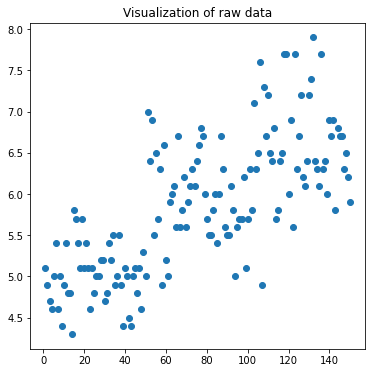

In [46]:
plt.figure(figsize=(6, 6))
plt.scatter(iris_df.iloc[:, 0],iris_df.iloc[:, 1])
plt.title('Visualization of raw data');

<AxesSubplot:>

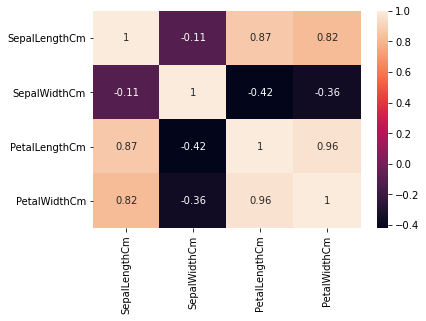

In [47]:
#Building Correlation Matrix
new_data = iris_df.drop('Id', axis = 1)
sns.heatmap(new_data.corr(), annot = True)

c:\users\hp\pycharmprojects\datascience\venv\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


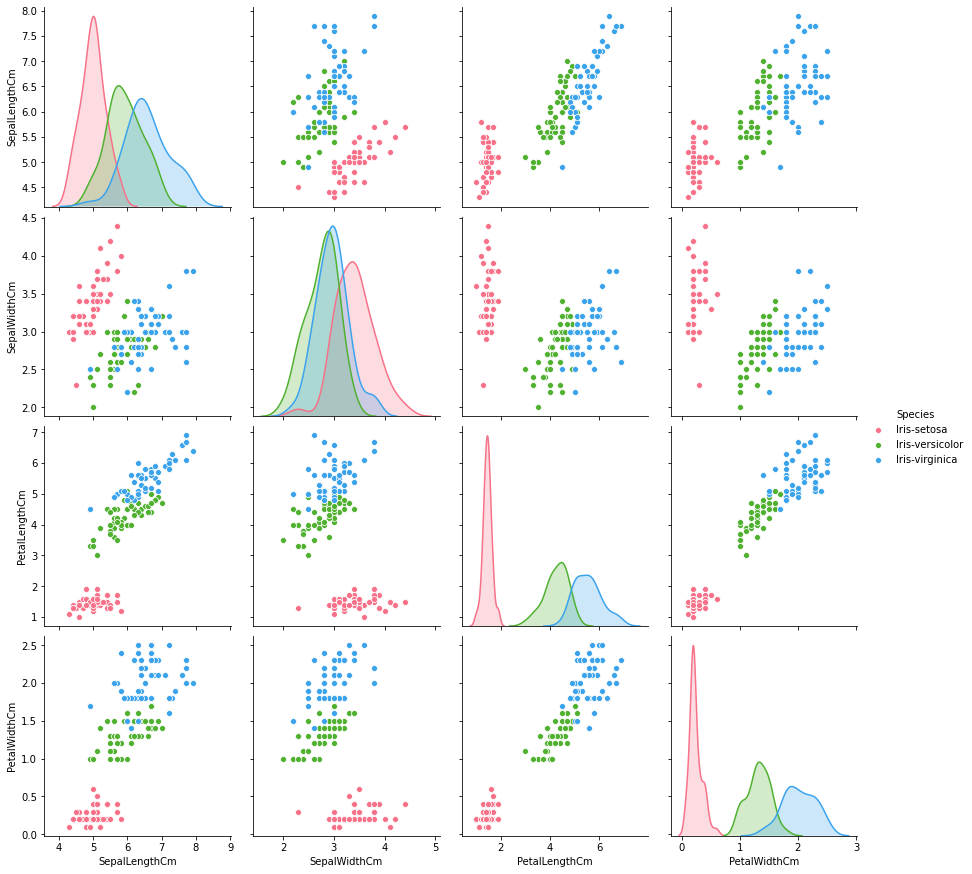

In [48]:
#Plotting Pair Plots
sns.pairplot(new_data, hue="Species", palette="husl", size=3, diag_kind="kde")

## Finding Optimum Number of Clusters

In [49]:
#Taking only Required Data 
x = iris_df.iloc[:, [1, 2, 3, 4]].values
from sklearn.cluster import KMeans
WCSS = []
for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state = 0)
    kmeans.fit(x)
    WCSS.append(kmeans.inertia_)

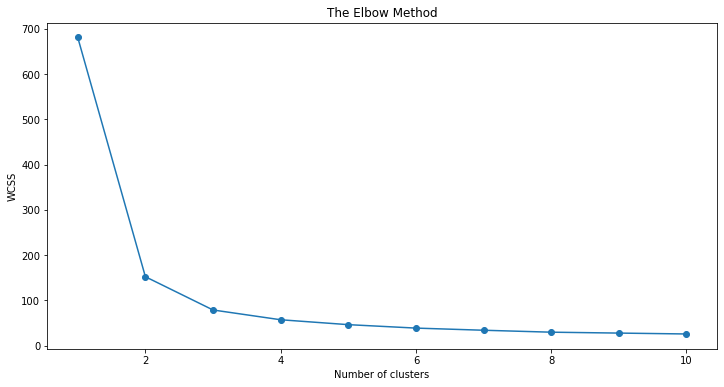

In [50]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11), WCSS, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph the optimal number of clusters is '3' found using elbow method.

In [53]:
#KMeans Using 3 Clusters and k-means++ Initialization
kmeans = KMeans(n_clusters = 3, init='k-means++', max_iter = 300, random_state = 0)
kmeans.fit(x)
pred = kmeans.predict(x)
print(pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Clustered Plot

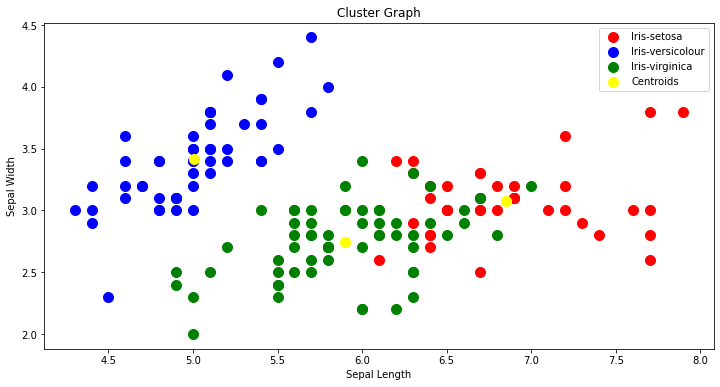

In [54]:
plt.figure(figsize=(12,6))
plt.title('Cluster Graph')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

plt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')

plt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')

plt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()